# Google Data Analytics Capstone Project
##### *prepared by Edward Goh*

This is part of the Google Data Analytics Capstone project, and this notebook is created to document the entire data analysis process and life cycle, and to showcase the skills that are being taught in the entire course. 

## Project background

Bellabeat, a high-tech manufacturer of health-focused products for women would like to explore new growth opportunities for the company. They would like to achieve this goal by analyzing the smart device fitness data. They hope to gain insight into how consumers are using their smart devices and help guide the marketing strategy for the company.

## Ask
#### Objectives:

  1. Identify the business task
  2. Consider key stakeholders

Business task : To analyze and discover trends and insights in usage data of smart devices and provide future marketing strategies for Bellabeat

Stakeholders :

  * High-level stake holders:
    + Bellabeat co-founder and Chief Creative Officer, Urska Srsen
    + Bellabeat co-founder, Sando Mur
    
  * Bellabeat marketing analytics team
 

# Prepare

#### Objectives:

  1. Download  data and store it appropriately.
  2. Identify how it's organized
  3. Sort and filter the data
  4. Determine the credibility of the data

The data set that is being used for this project is the [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) that is hosted on the Kaggle platform as a public dataset. The data is generated by 30 respondents from a distributed survey via the Amazon Mechanical Turk in the year 2016. The data includes the physical activity, heart rate and sleep monitoring records of the individuals.

The data set contains 18 CSV files that are well categorized with matching, concise file names.

Limitations of data:
   1. There is only 30 participants, which is a small sample size
   2. Data is collected back in 2016, it is not current
   3. Limited biodata, age, gender etc. are not included in the data
  
##### Disclaimer
License : [CCO 1.0 Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

Privacy : The data was collected with the consent of the users.

*More details can be accessed from the [dataset landing page](https://www.kaggle.com/arashnic/fitbit).*

## Process
#### Objectives:
1. Check the data for errors
2. Choose your tools
3. Transform the data so you can work with it effectively
4. Document the cleaning process

The tool that is chosen is the R programming language. This is because the dataset is large and cannot be handled efficiently by spreadsheets. SQL, on the other hand will require us to upload the data onto BigQuery or use another software. R on the other hand, can be used to document, process, analyze and visualize our data, all in one place. 


In [143]:
# Loading required libraries
library(tidyverse)
library(skimr)
library(lubridate)

For time being, the project scope is narrowed down to only inspecting the datsets that contain data recorded in daily intervals. 

In [144]:
# Reading all the csv files to preview them
df_daily_activity = read.csv('./dailyActivity_merged.csv')
df_daily_calories = read.csv('./dailyCalories_merged.csv')
df_daily_intensities = read.csv('./dailyIntensities_merged.csv')
df_daily_steps = read.csv('./dailySteps_merged.csv')
df_sleep_day = read.csv('./sleepDay_merged.csv')
df_weight_log_info = read.csv('./weightLogInfo_merged.csv')

In [145]:
# Taking a look at our data
head(df_daily_activity)
head(df_daily_calories)
head(df_daily_intensities)
head(df_daily_steps)
head(df_weight_log_info)
head(df_sleep_day)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


From taking a look at our data, we can know
1. The unique keys in these data is the Id and the Date in which the activities are recorded

2. The daily_activities dataset seems to contain all the columns in the daily_steps, daily_intensities and daily_calories. We will examine them further to see if we can omit the sub datasets to make our work easy.

3. There are some differences in the date format of the sleep_day and weight_log data. We will need to address them before we merge the dataset.

For now, we shall further examine the daily_steps, daily_intensities and daily_calories dataset and compare them to the daily_activites dataset.

From the head() function in the previous cell, we can see that the values are the same, for the first six rows. We shall examine the total no. of observations(rows), and amount of columns and see if they are identical.

In [146]:
dim(df_daily_activity)
colnames(df_daily_activity)
dim(df_daily_calories)
colnames(df_daily_calories)
dim(df_daily_intensities)
colnames(df_daily_intensities)
dim(df_daily_steps)
colnames(df_daily_steps)

[1] 940  15

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] 940   3

[1] "Id"          "ActivityDay" "Calories"

[1] 940  10

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

[1] 940   3

[1] "Id"          "ActivityDay" "StepTotal"

By comparing the dimension of all the data, it all has the same no of rows, and the no. of columns from the calories, intensities and steps table add up to the 13 columns(excluding the Id and ActivityDate) that the activities data has.

This means that it is probably fine for us to use the merged daily activities dataset. Now let's take a deeper look into that data. 

The description on Kaggle mentions that there are 30 individuals that are included in this dataset. Let's take a look

In [147]:
n_unique(df_daily_activity$Id)
unique(df_daily_activity$Id)

[1] 33

[1] 1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 [7] 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
[13] 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
[19] 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
[25] 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
[31] 8583815059 8792009665 8877689391

There seems to be 33 individuals in this data set, and upon inspecting the unique IDs there doesn't seem to be a typo anywhere in the data set. This might mean that there are some errors in the description of the dataset, which could be a small but possible reliability issue. 


Next, let's check for if any duplicate values are present in this daily activites dataset.

In [148]:
sum(duplicated(df_daily_activity))

[1] 0

There appears to be no duplicates in the dataset. The column names are also appropriately named, so there is no need to renamed the columns.

Let's combine 3 of the dataframes, daily activity, weight log and sleep day data into one merged dataframe. We will merge the datasets based on the Id and the Date.

We will need to address the inconsistency of the date format first.

In [149]:
# Managing the dates format before merging
# split the date and time into two columns, to avoid loss of time data
df_weight_log_info <- separate(df_weight_log_info, Date, into=c('Date','Weight_Record_Time'), sep=" ",extra="merge")

For the sleep data, all the time stamps are at 12:00:00 AM, so there won't be a loss of data. Let's retain only the dates in the data.

In [150]:
df_sleep_day$SleepDay <- gsub(x=df_sleep_day$SleepDay, pattern=" 12:00:00 AM",replacement = "", fixed=T)

In [151]:
#Merging the three datasets based on Id and Date
df_daily_merged <- merge(df_daily_activity, df_weight_log_info, by.x=c("Id", "ActivityDate"), by.y=c("Id", "Date"), all = TRUE)
df_daily_merged <- merge(df_daily_merged, df_sleep_day, by.x=c("Id", "ActivityDate"), by.y=c("Id", "SleepDay"), all = TRUE)

Now that the data is merged, let's use the skim function to see if there is any error.

In [152]:
skim(df_daily_merged)

── Data Summary ────────────────────────
                           Values         
Name                       df_daily_merged
Number of rows             943            
Number of columns          25             
_______________________                   
Column type frequency:                    
  character                3              
  numeric                  22             
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate   min   max empty n_unique
1 ActivityDate               0        1          8     9     0       31
2 Weight_Record_Time       876        0.0710    10    11     0       26
3 IsManualReport           876        0.0710     4     5     0        2
  whitespace
1          0
2          0
3          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable         

It seems that the 'Fat' column only has 2 values, this column of data is dropped since the lack of sample size is not going to provide any value to the analysis later on.

In [153]:
df_daily_merged <- subset(df_daily_merged, select = -c(Fat))

Our data cleaning and merging is now complete! Let us proceed to analyzing the data on hand.

### Analyze
#### Objectives:
1. Aggregate your data so it's useful and accessible
2. Organize and format your data
3. Perform Calculations
4. Identify trends and relationships

Let's take a look at the data and decide which columns might carry potential insights.

In [269]:
skim(df_daily_merged)

── Data Summary ────────────────────────
                           Values         
Name                       df_daily_merged
Number of rows             943            
Number of columns          28             
_______________________                   
Column type frequency:                    
  character                3              
  factor                   2              
  numeric                  23             
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate   min   max empty n_unique
1 ActivityDate               0        1          8     9     0       31
2 Weight_Record_Time       876        0.0710    10    11     0       26
3 IsManualReport           876        0.0710     4     5     0        2
  whitespace
1          0
2          0
3          0

── Variable type: factor ──────────────────────────────────────

#### Some columns that might be interesting:
* TotalSteps 
* TotalDistance
* Calories
* WeightKg
* TotalMinutesAsleep
* TotalTimeInBed

#### New columns can also be created:
#### ***Quantitative***
1. TimeToFallAsleep = TotalTimeInBed - TotalMinutesAsleep
2. TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes

#### ***Categorical***
1. ActivePerson - Active if ActiveMinutes > median (248)
2. SleepDuration - Good if TotalMinutesAsleep > 480, Adequate if > 420, else Inadequate 


#### Some relationships that might be of interest 
1. TotalDistance/TotalSteps vs TotalMinutesAsleep/TimeToFallAsleep
2. TotalDistance vs WeightKg
3. TotalMinutesAsleep vs WeightKg
4. SedentaryMinutes vs TotalMinutesAsleep/TimeToFallAsleep

We shall begin the analysis by calculating the new columns first

In [155]:
#Adding Quantitative Columns
df_daily_merged <- mutate(df_daily_merged, TimeToFallAsleep = TotalTimeInBed - TotalMinutesAsleep)
df_daily_merged <- mutate(df_daily_merged, TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

#Adding Categorical Columns
df_daily_merged$ActivePerson <- as.factor(ifelse(df_daily_merged$TotalActiveMinutes < 248, 'Not Active', 'Active'))
df_daily_merged$SleepDuration <- as.factor(ifelse(df_daily_merged$TotalMinutesAsleep > 480, 'Good',
                              ifelse(df_daily_merged$TotalMinutesAsleep > 420, 'Adequate','Inadequate')))

Next, some visualizations are plotted out to find potential patterns/trends

#### 1. TotalDistance vs TotalMinutesAsleep/TimeToFallAsleep

Warning message:
“Removed 530 rows containing missing values (geom_point).”
Warning message:
“Removed 530 rows containing missing values (geom_point).”


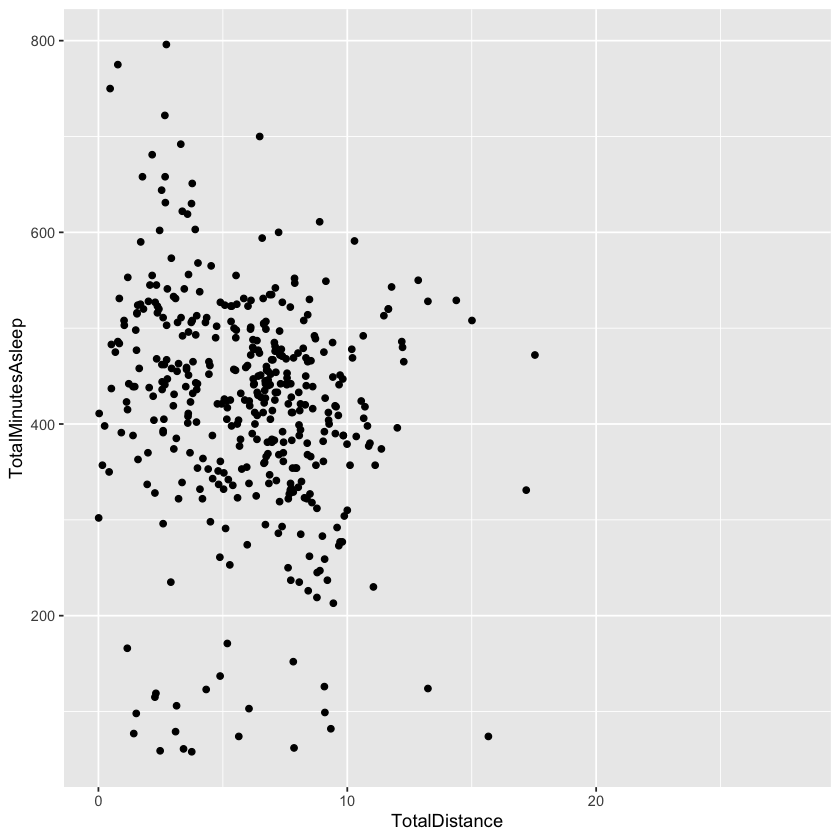

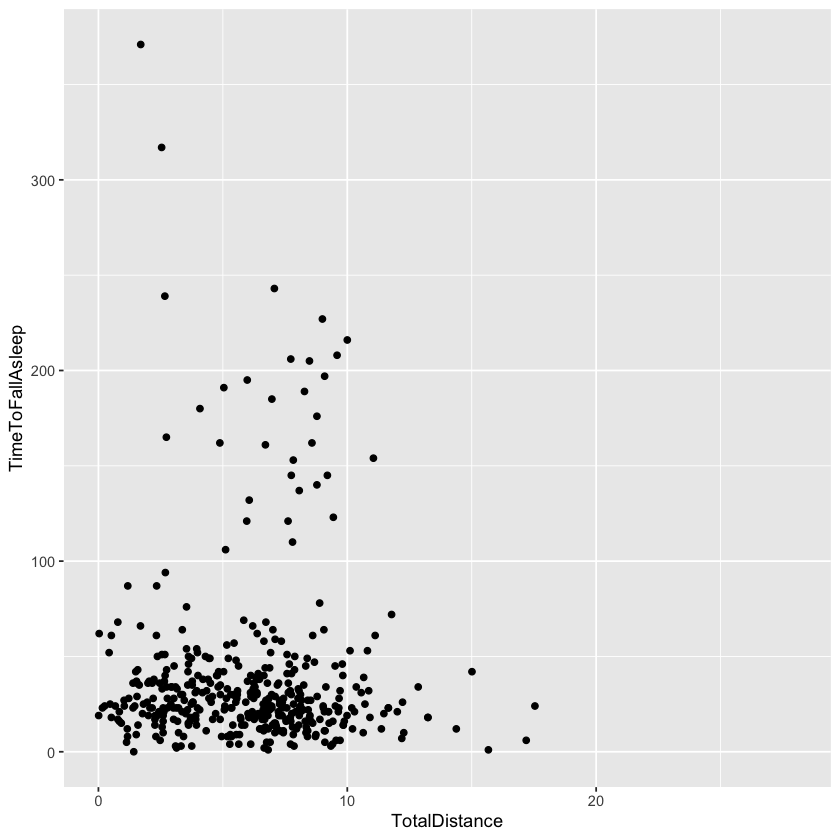

In [156]:
ggplot(data=df_daily_merged, aes(x=TotalDistance, y=TotalMinutesAsleep))+geom_point()
ggplot(data=df_daily_merged, aes(x=TotalDistance, y=TimeToFallAsleep)) + geom_point()

The visualization for distance vs sleeping duration does not show much relationship, as within the same distance range there is a huge spread.

The visualization for distance vs time to fall asleep, also suggests that most people do not walk more than 10KM and do not take more than 50 minutes to fall asleep.

#### 2. TotalDistance vs WeightKg

Warning message:
“Removed 876 rows containing missing values (geom_point).”


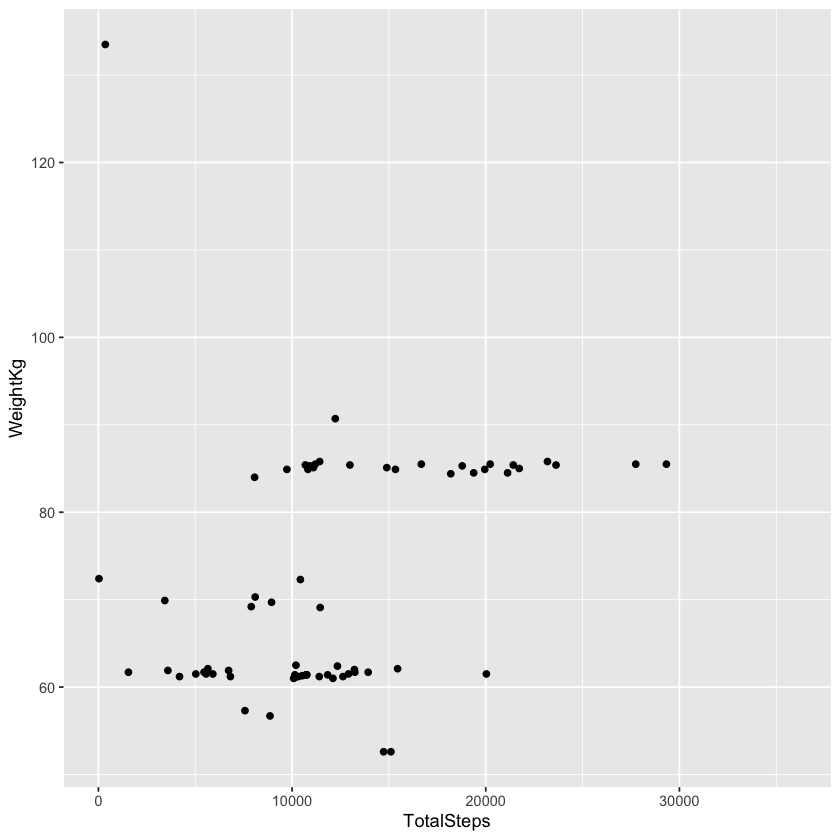

In [157]:
ggplot(data=df_daily_merged, aes(x=TotalSteps, y=WeightKg)) + geom_point() 

It can be seen that there are two sharp distributions of weight class, and there is no relationships between the two data as well.

It is to be noted that, in the entire dataset, only 7% of the weight data is present, so the the results are not extremely statistically significant.

#### 3. TotalMinutesAsleep vs WeightKg

Warning message:
“Removed 908 rows containing missing values (geom_point).”


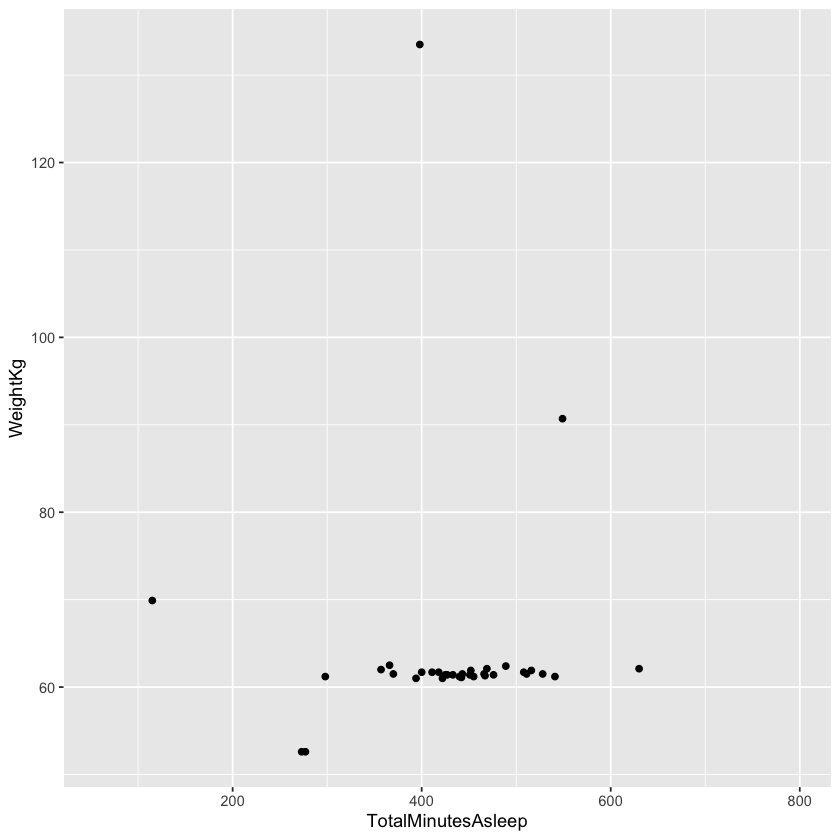

In [158]:
ggplot(data=df_daily_merged, aes(x=TotalMinutesAsleep, y=WeightKg)) + geom_point()

This comparison is also limited by the lack of weight data. This plot gives even less data point because both TotalMinutesAsleep and WeightKg is not complete.

#### 4. SedentaryMinutes vs TotalMinutesAsleep/TimeToFallAsleep

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 530 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 530 rows containing missing values (geom_point).”
Warning message:
“Removed 530 rows containing missing values (geom_point).”


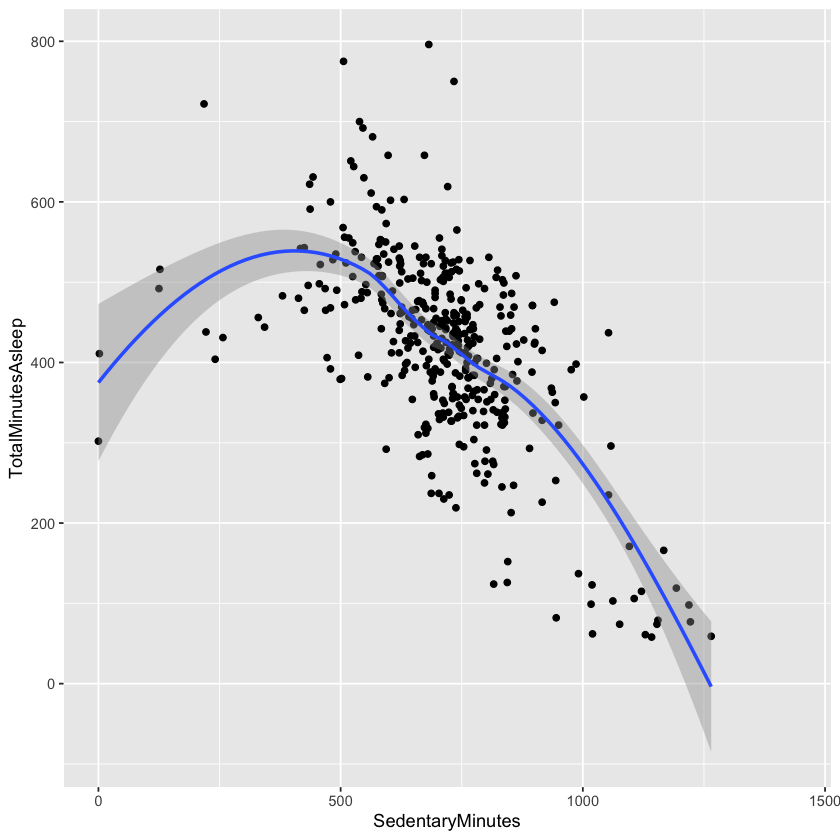

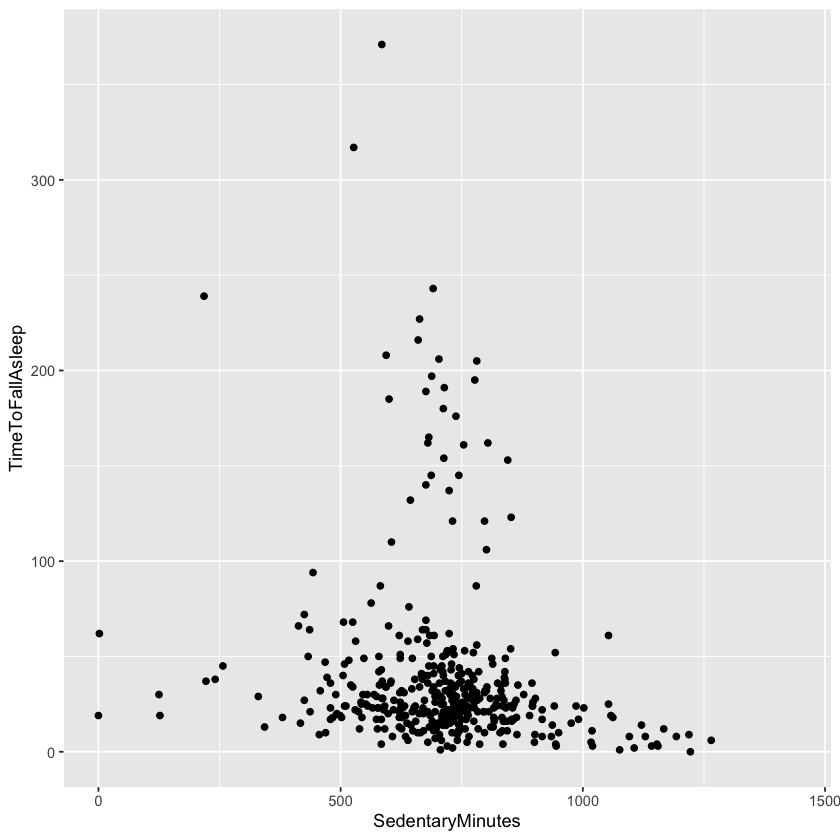

In [248]:
ggplot(data=df_daily_merged, aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) + geom_point() +geom_smooth()
ggplot(data=df_daily_merged, aes(x=SedentaryMinutes, y=TimeToFallAsleep)) + geom_point()

It seem that there is a correlation between the Sedantary minutes and the TotalMinutesAsleep.

Next, I think that we can take a look at the no. of steps itself. Let's use a histogram to visualize the data.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3795    7439    7652   10734   36019 

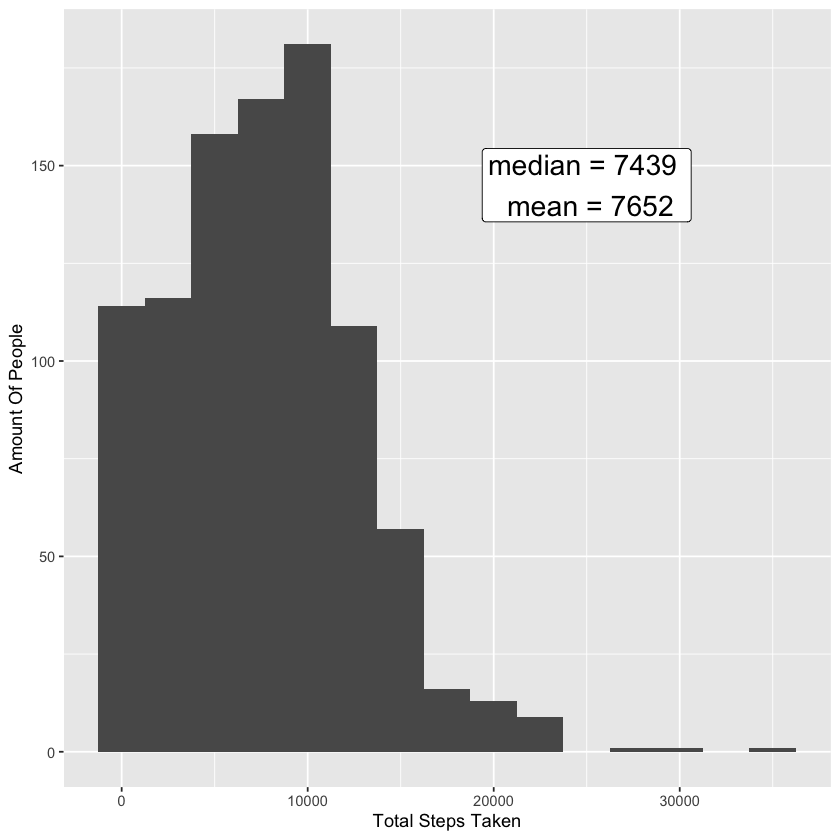

In [268]:
ggplot(data=df_daily_merged, aes(x=TotalSteps)) + 
geom_histogram(binwidth=2500) + 
annotate("label", x = 25000, y = 145, label = "median = 7439 \n mean = 7652", size = 6) +
labs(x= 'Total Steps Taken', y = 'Amount Of People', size = 8)

summary(df_daily_merged$TotalSteps)

From the histogram, we can see that the mean and median of the steps taken are less than the recommended daily steps of 10,000 steps.

### Summary of Analysis and Visualization

Connecting back to our original relationships that we wanted to explore:
#### 1. TotalDistance/TotalSteps vs TotalMinutesAsleep/TimeToFallAsleep

  There was no strong correlation between the total steps/distance taken against the total minutes asleep. This was seen by the variation in the total minutes asleep in the same distance interval.  

#### 2. TotalDistance vs WeightKg
#### 3. TotalMinutesAsleep vs WeightKg

  Both 2&3 were limited by the fact that WeightKg data is scarce

#### 4. SedentaryMinutes vs TotalMinutesAsleep/TimeToFallAsleep

  A correlation was foundbetween the Sedentary Minutes and Total Minutes Asleep data. It appears that the higher the sedentary minutes, the lower the total minutes asleep.

#### 5. TotalSteps taken

  From the histogram of the TotalSteps taken by each individual, we noticed that a large portion of individuals were taking steps less than the recommended 10,000 daily steps. We followed up by looking at the median and mean of the data, which was at 7439 and 7653 steps respectively.


## Act

There are two high-level recommendations that we will able to provide to Bellabeat from our limited analysis with this relatively small dataset.

1. **Bellabeat can provide users reminders at times to remind users to walk more.** This is because most users are walking less thant he recoomend 10,000 steps daily.

2. **There can also be reminders to remind users to stand up, and take a short break from their sedentary time periods.** 
    This can be integreated with devices that have heart rate monitors, and gyro sensors that can detect the user's activity levels and motion. When the device detects that users are resting for too long, it can remind them to take a break.
    